# **Zipf Law**




> **Datas**


Books = https://www.gutenberg.org/

Thanks the gutenberg project!



> **Source**


[Wikipedia Zipf Law](https://en.wikipedia.org/wiki/Zipf%27s_law)



###Zipf Law Analysis with Different Languages




In [ ]:
import urllib
import collections
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Zipf's law is an empirical law formulated using mathematical statistics that refers to the fact that many types of data studied in the physical and social sciences can be approximated with a Zipfian distribution, one of a family of related discrete power law probability distributions.
![alt text](https://miro.medium.com/max/992/1*rBRq-Wn1YRJqUU4O9MRdFQ.png)

the order of the most used words follows the zipf law

1st word => 100/1 = 100

2nd word => 100/2 = 50

3rd word => 100/3 = 33,3

4th word => 100/4 = 25

5th word => 100/5 = 20

6th word => 100/6 = 16,6

7th word => 100/7 = 14,3

8th word => 100/8 = 12,5

9th word => 100/9 = 11,1

10th word => 100/10= 10


In [ ]:
#gerekli fonsiyonların yazılması.
def zipf_tablo_olustur(metin, kelime_sayisi):
  """
  Verilen satir sayisi kadar verileri içeren,
  en sık kullanılan kelimeler, sıklıkları ve
  diğer verileri bulunduran 
  sözlüklerin bir listesini oluşturur.
  """

  metin = metni_temizle(metin)
  metin = metin.lower()
  _kelime_tekrar_sayilari = kelime_tekrar_sayilari(metin, kelime_sayisi)
  zipf_tablosu = tablo_olustur(_kelime_tekrar_sayilari)
  
  return zipf_tablosu


def metni_temizle(metin):
  """
  Verilen metin içerisindeki işaret, noktalama işaretleri
  ve sayıları temizler.
  """

  silinecekler = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"
  temiz_metin = str.maketrans("", "", silinecekler)

  return metin.translate(temiz_metin)


def kelime_tekrar_sayilari(metin, kelime_sayisi):
  """
  Sık kullanılan kelimeden en aza doğru sıralama yapar.
  Counter objesi şeklinde liste döndürür.
  """

  kelimeler = metin.split()#boşluklardan ayıkla.
  kelime_tekrarlari = collections.Counter(kelimeler)#kelime listesi için bir koleksiyon oluşturma.
  kelime_frekansları = kelime_tekrarlari.most_common(kelime_sayisi)#en çok kullanılan kelimeleri istenen sayida tut.

  return kelime_frekansları


def tablo_olustur(kelime_frekansları):
  """
  kelime_tekrar_sayilarinin bulunduğu objeyi alır
  ve sözlüklerden oluşan verilerin bulunduğu
  bir şekilde liste olarak geri döndürür.
  """

  zipf_tablosu = []
  frekans = kelime_frekansları[0][1]

  for index, item in enumerate(kelime_frekansları, start=1):
    yasaya_gore_frekans = "1/{}".format(index)
    zipf_frekansı = frekans * (1 / index)
    fark = item[1] - zipf_frekansı
    yuzde_fark = (item[1] / zipf_frekansı) * 100
    zipf_tablosu.append({"kelime": item[0],
                        "tekrar_sayisi": item[1],
                        "yasaya_gore_frekans": yasaya_gore_frekans,
                        "zipf_frekansı": zipf_frekansı,
                        "fark": fark,
                        "yuzde_fark": yuzde_fark})

  return zipf_tablosu

In [ ]:
#roman okuma
url = 'http://www.gutenberg.org/cache/epub/730/pg730.txt'
f = urllib.request.urlopen(url)
text = str(f.read(),('utf-8'))

kelime_sayisi = 10
zipf_tablosu = zipf_tablo_olustur(text, kelime_sayisi)
df = pd.DataFrame(zipf_tablosu)
df

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,the,9770,1/1,9770.000000,0.000000,100.000000
1,and,5425,1/2,4885.000000,540.000000,111.054248
2,of,3981,1/3,3256.666667,724.333333,122.241556
3,to,3948,1/4,2442.500000,1505.500000,161.637666
4,a,3785,1/5,1954.000000,1831.000000,193.705220
5,in,2430,1/6,1628.333333,801.666667,149.232344
6,he,2397,1/7,1395.714286,1001.285714,171.740020
7,his,2356,1/8,1221.250000,1134.750000,192.917093
8,that,1846,1/9,1085.555556,760.444444,170.051177
9,was,1787,1/10,977.000000,810.000000,182.906858


###Data Visualization





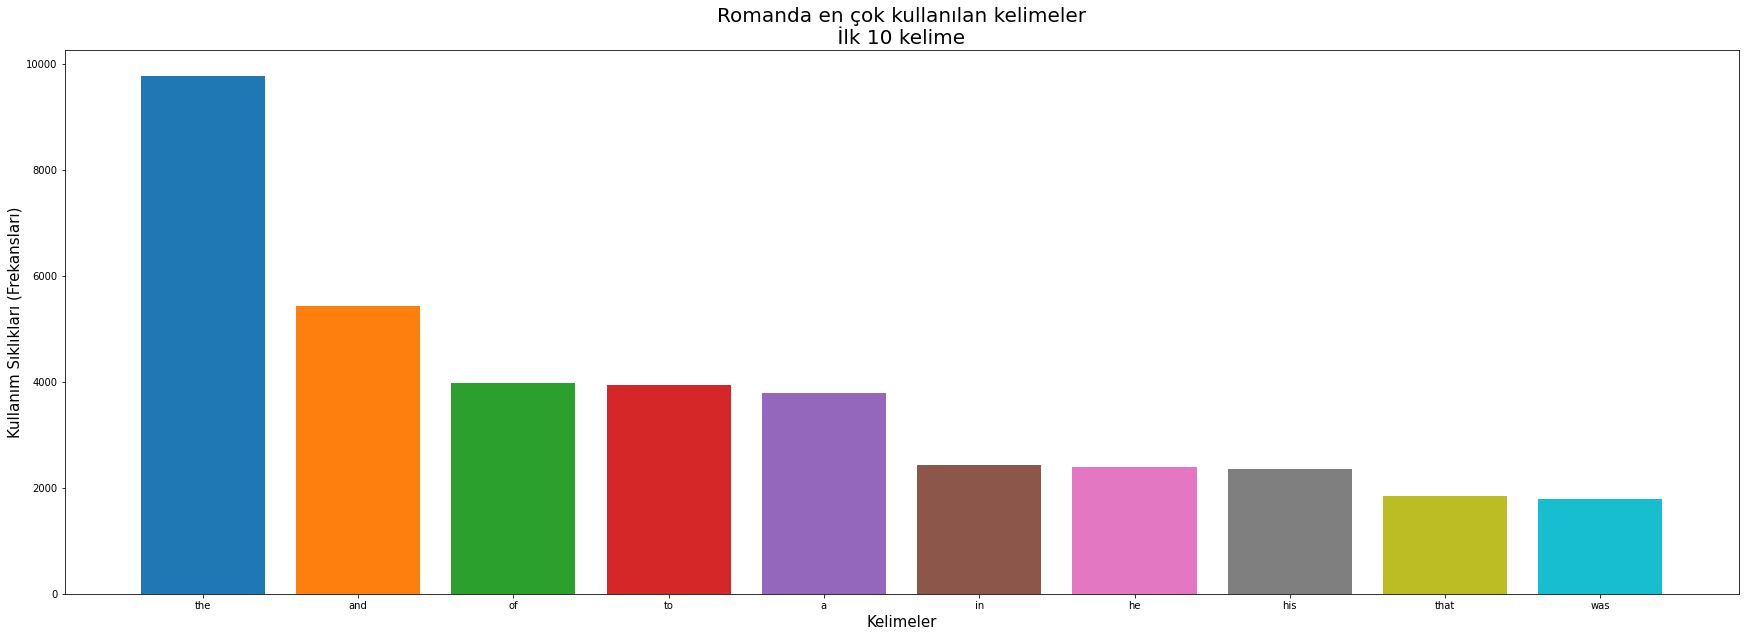

In [ ]:
plt.figure(figsize=(30,10))
for index, item in enumerate(zipf_tablosu, start=1):
  plt.bar(item["kelime"],item["tekrar_sayisi"])
plt.title("Romanda en çok kullanılan kelimeler\n" + " İlk " + str(kelime_sayisi) + " kelime ", fontsize = 20)
plt.xlabel('Kelimeler', fontsize=15)
plt.ylabel('Kullanım Sıklıkları (Frekansları)', fontsize=15)
plt.rc(['xtick','ytick'], labelsize=14)

In [ ]:
kelime_sayisi = 10000
zipf_tablosu = zipf_tablo_olustur(text, kelime_sayisi)
df = pd.DataFrame(zipf_tablosu)
df

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,the,9770,1/1,9770.000000,0.000000,100.000000
1,and,5425,1/2,4885.000000,540.000000,111.054248
2,of,3981,1/3,3256.666667,724.333333,122.241556
3,to,3948,1/4,2442.500000,1505.500000,161.637666
4,a,3785,1/5,1954.000000,1831.000000,193.705220
...,...,...,...,...,...,...
9995,sallying,1,1/9996,0.977391,0.022609,102.313204
9996,restrained,1,1/9997,0.977293,0.022707,102.323439
9997,dissuade,1,1/9998,0.977195,0.022805,102.333675
9998,hotbrained,1,1/9999,0.977098,0.022902,102.343910


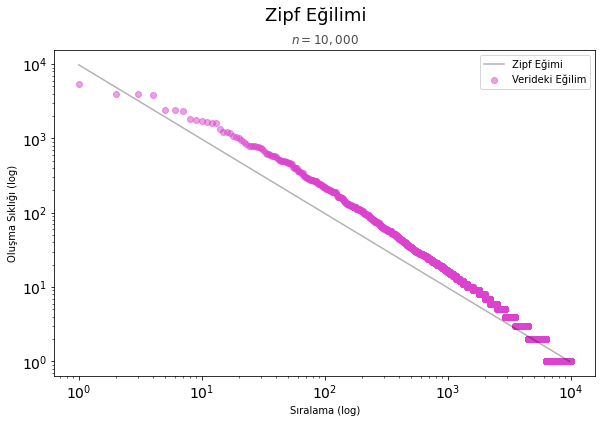

In [ ]:
fr = df['tekrar_sayisi']
indisler = np.argsort(-df['tekrar_sayisi'])
frekanslar = fr[indisler]
"""
x_ekseni = np.arange(1,len(frekanslar))
alpha = (-np.log(6) / np.log(5))
y_ekseni = (1 / sum(x_ekseni**alpha)) * x_ekseni**alpha
"""

plt.figure(figsize=(9.7, 6))
plt.scatter(indisler, frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,frekanslar[0]], [frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

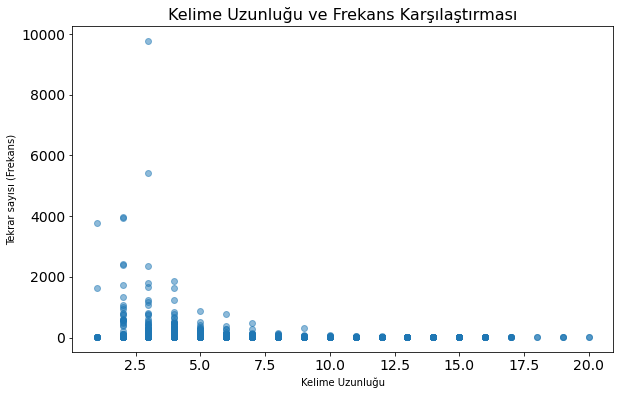

In [ ]:
uzunluklar = [len(k) for k in df['kelime']]
plt.figure(figsize=(9.7, 6))
plt.scatter(uzunluklar, frekanslar, alpha=.5)
plt.xlabel('Kelime Uzunluğu')
plt.ylabel('Tekrar sayısı (Frekans)')
plt.title('Kelime Uzunluğu ve Frekans Karşılaştırması', fontsize=16)
plt.show()

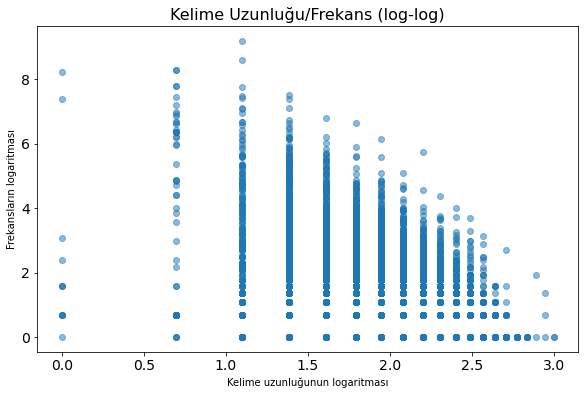

In [ ]:
log_degerler = np.log(frekanslar)
plt.figure(figsize=(9.7, 6))
log_uzunluklar = np.log(np.array(uzunluklar))
plt.scatter(log_uzunluklar, log_degerler, alpha=.5)
plt.xlabel('Kelime uzunluğunun logaritması')
plt.ylabel('Frekansların logaritması')
plt.title('Kelime Uzunluğu/Frekans (log-log)', fontsize=16)
plt.show()

**FARKLI DİLLERDE ZIPF EĞİLİMLERİ**

In [ ]:
def url_oku(url):
  """
  İçerisine gönderilen str url'i okur ve dataframe objesi
  olarak geri döndürür. 
  """
  f = urllib.request.urlopen(url)
  text = str(f.read(),('utf-8'))
  tablo = zipf_tablo_olustur(text, 10000)
  df = pd.DataFrame(tablo)
  
  return df

In [ ]:
df_ispanyolca = url_oku('https://www.gutenberg.org/files/58221/58221-0.txt')
df_ingilizce = url_oku('http://www.gutenberg.org/files/4300/4300-0.txt')
df_almanca = url_oku('https://www.gutenberg.org/files/54597/54597-0.txt')
df_fransizca = url_oku('http://www.gutenberg.org/cache/epub/18716/pg18716.txt')

In [ ]:
df_ispanyolca

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,de,8235,1/1,8235.000000,0.000000,100.000000
1,y,7513,1/2,4117.500000,3395.500000,182.465088
2,á,7033,1/3,2745.000000,4288.000000,256.211293
3,que,5621,1/4,2058.750000,3562.250000,273.029751
4,la,5135,1/5,1647.000000,3488.000000,311.778992
...,...,...,...,...,...,...
9995,metióse,1,1/9996,0.823830,0.176170,121.384335
9996,acebuche,1,1/9997,0.823747,0.176253,121.396478
9997,entrelazados,1,1/9998,0.823665,0.176335,121.408622
9998,bastaran,1,1/9999,0.823582,0.176418,121.420765


In [ ]:
df_ingilizce

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,the,15018,1/1,15018.000000,0.000000,100.000000
1,of,8254,1/2,7509.000000,745.000000,109.921428
2,and,7217,1/3,5006.000000,2211.000000,144.167000
3,a,6518,1/4,3754.500000,2763.500000,173.605007
4,to,5030,1/5,3003.600000,2026.400000,167.465708
...,...,...,...,...,...,...
9995,bosses,2,1/9996,1.502401,0.497599,133.120256
9996,betide,2,1/9997,1.502251,0.497749,133.133573
9997,clover,2,1/9998,1.502100,0.497900,133.146890
9998,pup,2,1/9999,1.501950,0.498050,133.160208


In [ ]:
df_almanca

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,und,3428,1/1,3428.000000,0.000000,100.000000
1,der,2843,1/2,1714.000000,1129.000000,165.869312
2,die,2557,1/3,1142.666667,1414.333333,223.774796
3,ich,1949,1/4,857.000000,1092.000000,227.421237
4,in,1610,1/5,685.600000,924.400000,234.830805
...,...,...,...,...,...,...
9995,gewannen,1,1/9996,0.342937,0.657063,291.598600
9996,tröstliche,1,1/9997,0.342903,0.657097,291.627771
9997,durchwegs,1,1/9998,0.342869,0.657131,291.656943
9998,unbeschädigt,1,1/9999,0.342834,0.657166,291.686114


In [ ]:
df_fransizca

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,de,3321,1/1,3321.000000,0.000000,100.000000
1,et,1652,1/2,1660.500000,-8.500000,99.488106
2,la,1537,1/3,1107.000000,430.000000,138.843722
3,à,1500,1/4,830.250000,669.750000,180.668473
4,le,1299,1/5,664.200000,634.800000,195.573622
...,...,...,...,...,...,...
9995,devenait,1,1/9996,0.332233,0.667767,300.993677
9996,accourûmes,1,1/9997,0.332200,0.667800,301.023788
9997,pressés,1,1/9998,0.332166,0.667834,301.053899
9998,mâchait,1,1/9999,0.332133,0.667867,301.084011


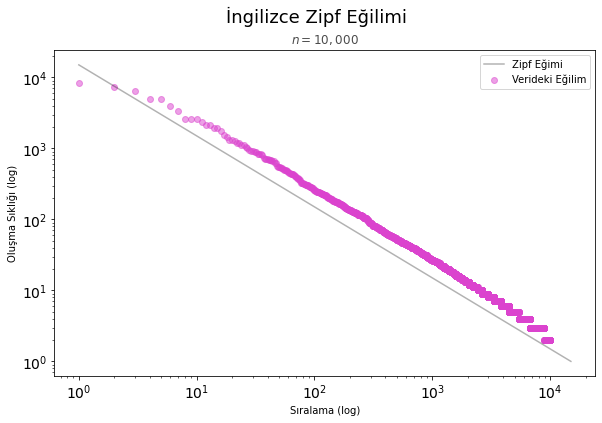

In [ ]:
fr = df_ingilizce['tekrar_sayisi']
indisler = np.argsort(-df_ingilizce['tekrar_sayisi'])
ingilizce_frekanslar = fr[indisler]

plt.figure(figsize=(9.7, 6))
plt.scatter(indisler, ingilizce_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,ingilizce_frekanslar[0]], [ingilizce_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("İngilizce Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

<center><h2>İngilizce, Zipf kuralına en çok uyan dil. Kelimelerin kullanım sıklığına baktığımızda Zipf kuralının öngördüğü şekilde bir orantı var.<h2/><center/>

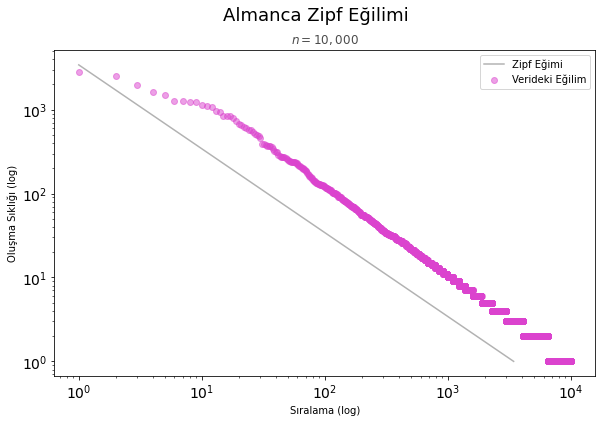

In [ ]:
fr = df_almanca['tekrar_sayisi']
indisler = np.argsort(-df_almanca['tekrar_sayisi'])
almanca_frekanslar = fr[indisler]

plt.figure(figsize=(9.7, 6))
plt.scatter(indisler, almanca_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,almanca_frekanslar[0]], [almanca_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Almanca Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

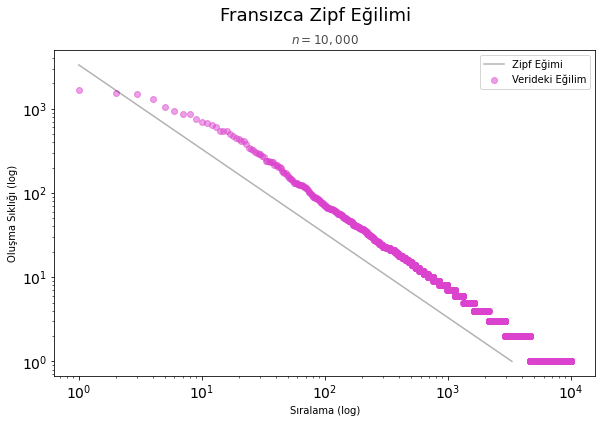

In [ ]:
fr = df_fransizca['tekrar_sayisi']
indisler = np.argsort(-df_fransizca['tekrar_sayisi'])
fransizca_frekanslar = fr[indisler]

plt.figure(figsize=(9.7, 6))
plt.scatter(indisler, fransizca_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,fransizca_frekanslar[0]], [fransizca_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Fransızca Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

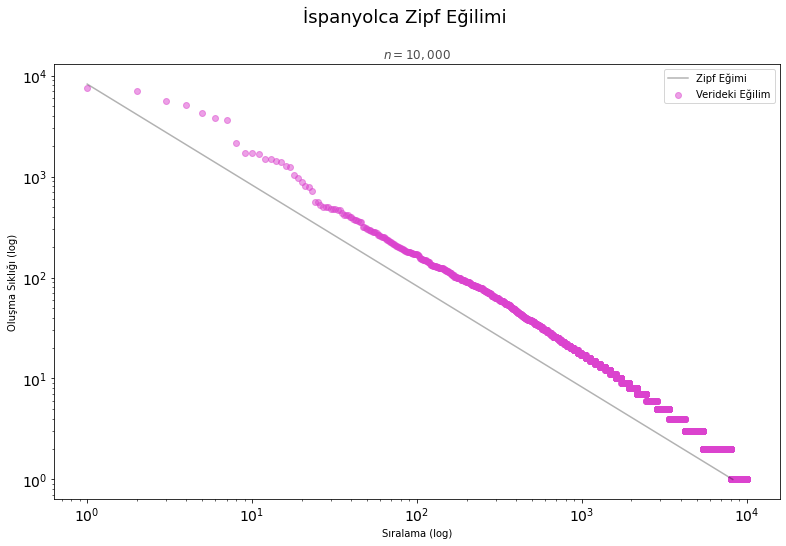

In [ ]:
fr = df_ispanyolca['tekrar_sayisi']
indisler = np.argsort(-df_ispanyolca['tekrar_sayisi'])
ispanyolca_frekanslar = fr[indisler]

plt.figure(figsize=(13, 8))
plt.scatter(indisler, ispanyolca_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,ispanyolca_frekanslar[0]], [ispanyolca_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("İspanyolca Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

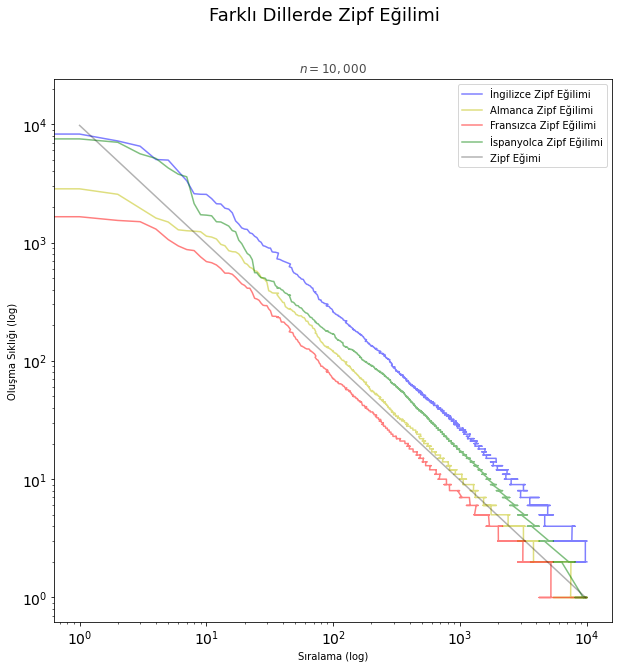

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(indisler, ingilizce_frekanslar, alpha=.5, label='İngilizce Zipf Eğilimi', color='b')
plt.plot(indisler, almanca_frekanslar, alpha=.5, label='Almanca Zipf Eğilimi', color='y')
plt.plot(indisler, fransizca_frekanslar, alpha=.5, label='Fransızca Zipf Eğilimi', color='r')
plt.plot(indisler, ispanyolca_frekanslar, alpha=.5, label='İspanyolca Zipf Eğilimi', color='g')
plt.plot([1,frekanslar[0]], [frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Farklı Dillerde Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

fr = df_ispanyolca['tekrar_sayisi']
indisler = np.argsort(-df_ispanyolca['tekrar_sayisi'])
ispanyolca_frekanslar = fr[indisler]
w = df_ispanyolca['kelime']
ispanyolca_kelimeler = w[indisler]

trace0 = go.Scatter(
  x = indisler, 
  y = ispanyolca_frekanslar,
  fill= None,
  mode='text',
  text=ispanyolca_kelimeler,
  name='Kelimeler',
  line=dict(
      color='rgb(0, 255, 255)',
  )
)
data = [trace0]
layout = go.Layout(
  xaxis=dict(title='Kelime Sıralaması', type='log'),
  yaxis=dict(title='Kelime Frekansları', type='log'),
  title='Kelimelerin Dağılımları', showlegend = False)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)